# Case Study
Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

Size of training set: 12,690 records

Size of test set: 4,231 records

# Problem Statement
We need to predict Cost of restaurants for 2 person, it's an regression problem.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading data
train_df=pd.read_excel("/Users/bhupendrakumar/Documents/ML Data Scientist Projects/Data-Science-ML-Capstone-Projects-master/Participants_Data_Final/Data_Train.xlsx")

In [3]:
train_df['TIME'][12685]

'12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...'

In [4]:
train_df.shape

(12690, 9)

In [5]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [6]:
train_df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

# EDA (Exploratory Data Analysis)

In [7]:
# Checking duplicate instances
train_df.duplicated().sum()

25

In [8]:
# Dropping duplicate instances
train_df=train_df.drop_duplicates()

In [9]:
# Missing Value Analysis 
train_df.isnull().sum()
# I will remove all null values, as it's not going to effect our data quantity.

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [10]:
# Removing null values
train_df=train_df.dropna()

In [11]:
# Storing vote counts only and Type casting features VOTES and RATING. 
train_df["VOTES"] = train_df["VOTES"].str.split()
train_df["VOTES"] = train_df["VOTES"].str[0].astype("int")
train_df['RATING']=pd.to_numeric(train_df['RATING'])

In [12]:
train_df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int64
COST               int64
dtype: object

In [13]:
# I can remove Restaurant ID and CITY as Locality will give most of valuable information.
train_df=train_df.drop(['RESTAURANT_ID','CITY'],axis=1)

In [14]:
train_df.head()

,TITLE,CUISINES,TIME,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Lower Parel,3.8,165,300


In [15]:
train_df.describe()
# VOTES Feature is left skewed. Outliers are present. But this feature is important.
# possibly restaraunts with max vote counts are more famous.

,RATING,VOTES,COST
count,11372.000000,11372.000000,11372.000000
mean,3.784075,416.953394,682.770049
std,0.422101,846.113843,647.315941
min,2.000000,4.000000,50.000000
25%,3.500000,57.000000,300.000000
50%,3.800000,163.000000,500.000000
75%,4.100000,457.250000,800.000000
max,4.900000,41186.000000,14000.000000


In [16]:
print(train_df['TIME'].value_counts())
print(len(list(train_df['TIME'].value_counts())))

11am – 11pm (Mon-Sun)                              1246
12noon – 12midnight (Mon-Sun)                       433
12noon – 11pm (Mon-Sun)                             381
11am – 12midnight (Mon-Sun)                         277
12noon – 1am (Mon-Sun)                              188
                                                   ... 
12midnight – 2am (Mon),11am – 12midnight...           1
2pm – 1:30am (Mon-Sun)                                1
Closed (Mon),11:30am – 3:30pm, 6:30pm – 10pm...       1
12noon – 3:30pm, 7pm – 11pm (Mon-Thu),7am –...        1
6pm – 1:30am (Mon-Thu),12noon – 4pm, 6pm –...         1
Name: TIME, Length: 2543, dtype: int64
2543


In [17]:
print(train_df['TITLE'].value_counts())
print(len(list(train_df['TITLE'].value_counts())))

QUICK BITES                 3668
CASUAL DINING               3392
None                         798
CAFÉ                         542
DESSERT PARLOR               340
                            ... 
SWEET SHOP,BEVERAGE SHOP       1
PUB,CAFÉ                       1
BAR,MICROBREWERY               1
MEAT SHOP                      1
BAR,CLUB                       1
Name: TITLE, Length: 111, dtype: int64
111


In [18]:
print(train_df['CUISINES'].value_counts())
print(len(list(train_df['CUISINES'].value_counts())))

North Indian, Chinese                                          457
South Indian                                                   456
North Indian                                                   447
Fast Food                                                      238
Chinese                                                        155
                                                              ... 
Mediterranean, Continental                                       1
Gujarati, Rajasthani, Desserts                                   1
Italian, Pizza, Beverages                                        1
North Indian, Continental, Asian, Italian, Malaysian, Pizza      1
Kerala, Seafood, North Indian                                    1
Name: CUISINES, Length: 3913, dtype: int64
3913


In [19]:
# Title will be an valuable information, since it represents the king of CUISINES it will carry within.

In [20]:
# Feature Engineering
# Creating a new feature representing day or night restaurants.
def Create_newFeatureDNRest(TimeInst):
    D=""
    N=""
    sOutputStr=""
    if "am" in str(TimeInst):
        D="D"
    if "pm" in str(TimeInst):
        N="N"
    sOutputStr=D+N
    return(sOutputStr)
    

In [21]:
train_df['TIME']=pd.DataFrame(map(str,train_df['TIME']))


In [22]:
train_df['DAY AND NIGHT']=pd.Series(map(Create_newFeatureDNRest,train_df['TIME']))

In [23]:
train_df['DAY AND NIGHT'].value_counts()

DN    4909
N     2072
D     1617
      1613
Name: DAY AND NIGHT, dtype: int64

In [24]:
train_df['RATING'].value_counts()

3.9    1231
3.8    1181
4.0    1087
3.7    1077
3.6     940
4.1     923
3.5     759
4.2     714
3.4     569
4.3     553
3.3     363
4.4     359
3.2     265
4.5     196
2.9     186
3.1     185
3.0     169
2.8     146
4.6     134
2.7      89
4.7      65
2.6      61
2.5      35
4.8      31
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

In [25]:
train_df

,TITLE,CUISINES,TIME,LOCALITY,RATING,VOTES,COST,DAY AND NIGHT
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Dombivali East,3.6,49,1200,DN
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Ramapuram,4.2,30,1500,N
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Saligramam,3.8,221,800,DN
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Bandra West,4.1,24,800,D
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Lower Parel,3.8,165,300,D
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab",NaN,Gachibowli,3.8,546,500,NaN
12686,"CASUAL DINING,BAR","Goan, Continental",NaN,Bandra Kurla Complex,4.3,1214,1800,NaN
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",NaN,Vashi,4.0,608,1300,NaN
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",NaN,Maduravoyal,3.5,32,400,NaN


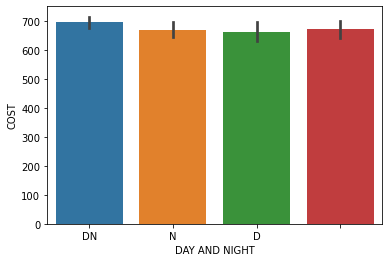

In [26]:
# Plotting barplots
sns.barplot(x='DAY AND NIGHT',y='COST',data=train_df)
# It's of much no use, I can drop DAY AND NIGHT and TIME feature.

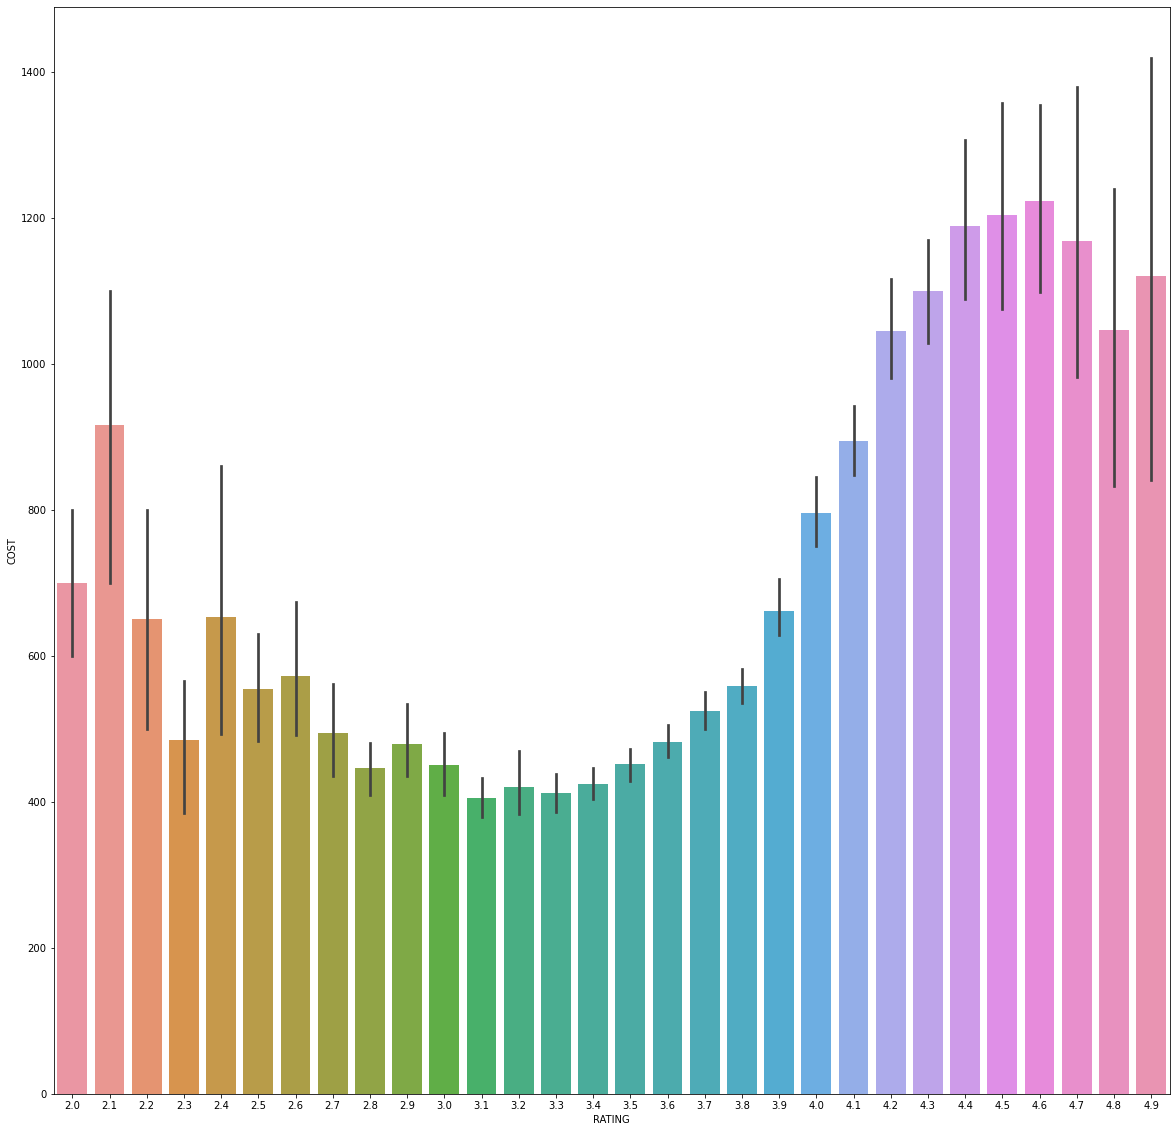

In [27]:
plt.figure(figsize=(20,20))
sns.barplot(x='RATING',y='COST',data=train_df)
# rating from 4.1 to 4.9 has more cost on average than below average, which is quite obvious.

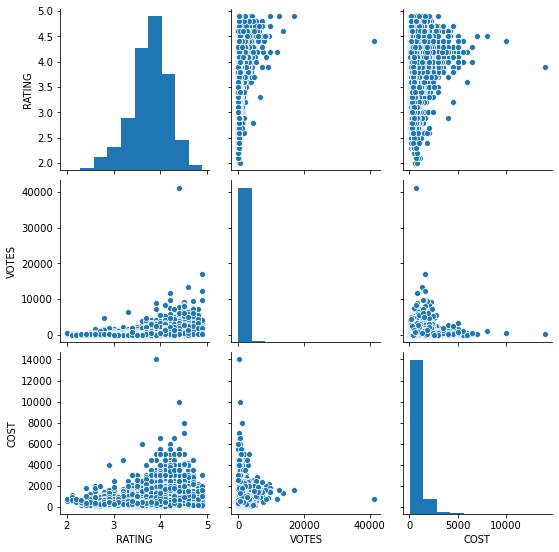

In [28]:
# Bivariate Analysis
# Plotting pairplot
sns.pairplot(train_df)
# Observation
# No features are correlated with each other. No need to remove any continuous feature

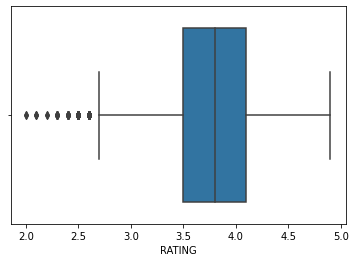

In [29]:
# Outlier Analuysis
sns.boxplot(train_df['RATING'])

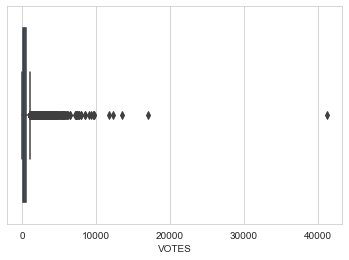

In [30]:
sns.set_style('whitegrid')
sns.boxplot(train_df['VOTES'])

In [31]:
train_df[train_df['VOTES']>40000]
# It's rating is 4.4 and cost is 750. Which might be an outlier in general as rating is 4.4 still cost is bit less.
# As we observed earlier higher rating restaurant has higher cost comparatively. Still I won't remove outliers.

,TITLE,CUISINES,TIME,LOCALITY,RATING,VOTES,COST,DAY AND NIGHT
7262,CASUAL DINING,"Biryani, Hyderabadi, North Indian, Seafood","12noon – 3:30pm, 7pm – 11pm (Mon-Sun)",Nallakunta,4.4,41186,750,N


In [32]:
# corr matrix
corr_mat=train_df.corr()
corr_mat

,RATING,VOTES,COST
RATING,1.000000,0.349273,0.326821
VOTES,0.349273,1.000000,0.244776
COST,0.326821,0.244776,1.000000


# Model Selection

In [33]:
Y=train_df['COST']
X=train_df.drop('COST',axis=1)

In [34]:
print(X.shape)
print(Y.shape)

(11372, 7)
(11372,)


In [35]:
# Normalization
colList=['RATING','VOTES']
for col in colList:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [36]:
X.head()

,TITLE,CUISINES,TIME,LOCALITY,RATING,VOTES,DAY AND NIGHT
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Dombivali East,0.551724,0.001093,DN
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Ramapuram,0.758621,0.000631,N
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Saligramam,0.620690,0.005269,DN
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Bandra West,0.724138,0.000486,D
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Lower Parel,0.620690,0.003909,D


In [37]:
# Removing CUISINES, TIME and DAY AND NIGHT features
X.drop(['CUISINES','TIME','DAY AND NIGHT'],axis=1,inplace=True)

In [38]:
X.head()

,TITLE,LOCALITY,RATING,VOTES
0,CASUAL DINING,Dombivali East,0.551724,0.001093
1,"CASUAL DINING,BAR",Ramapuram,0.758621,0.000631
2,CASUAL DINING,Saligramam,0.620690,0.005269
3,QUICK BITES,Bandra West,0.724138,0.000486
4,DESSERT PARLOR,Lower Parel,0.620690,0.003909


In [39]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding
X = OrdinalEncoder().fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
# Calculating root mean squared log error.
def rmlse(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [42]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=LinearRegression()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs, test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs
print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Linear regression is giving rmlse 80 at random state 63

Best rmlse Score is 0.8002342603485809 for random state 63.


In [43]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=DecisionTreeRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs
print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Decision Tree is giving rmlse 84 at random state 93

Best rmlse Score is 0.8419411185612319 for random state 42.


In [44]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=SVR(gamma='scale')
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Support Vector is giving rmlse 80 at random state 99

Best rmlse Score is 0.8015555961622264 for random state 99.


In [45]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=AdaBoostRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# AdaBoost is giving rmlse 76 at random state 67

Best rmlse Score is 0.8007805367591695 for random state 66.


In [46]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=GradientBoostingRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))
# Gradient Boosting is giving rmlse 91 at random state 63

Best rmlse Score is 0.9123277170603916 for random state 63.


In [47]:
# Gradient Boosting Classifier is giving best result. Let's deploy it after checking it's cross val score.
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['friedman_mse', 'mse', 'mae'],'n_estimators':[100,200,300]}
gbr=GradientBoostingRegressor()
gsgb=GridSearchCV(gbr,parameters)
gsgb.fit(X,Y)
print(gsgb.best_params_)

{'criterion': 'mse', 'n_estimators': 300}


In [48]:
from sklearn.model_selection import cross_val_score
# Gradient Boost Algorithm is giving us the best result with 99% accuracy, let's use corss validation and later prepare our final model.
cross_val_score(GradientBoostingRegressor(),X,Y,cv=5,scoring="r2").mean()
# It's a low score, model is not suffering from over or under fitting.

0.6819583803661219

In [52]:
# Max random state is coming around 90 and best model came out to be Gradient Boodting. We will create final model around that.
gbm=GradientBoostingRegressor(criterion='mse',n_estimators=300)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=63,test_size=0.2)
gbm.fit(x_train,y_train)
pred=gbm.predict(x_test)

In [53]:
# Checking error and accuracy
print("r2_score is ",rmlse(pred,y_test))

r2_score is  0.917325282249496


In [54]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(gbm,'GradBoost_RestCost.pkl')

['GradBoost_RestCost.pkl']